In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)


stock_data = pd.read_csv('source\dfnew_clean.csv')
print(stock_data)

        DateTime  Volume  Transaction   Open   High    Low  Close Dir  Change  \
0     2013-01-02   40647        14353   97.6   99.9   97.1   99.6   +     2.6   
1     2013-01-03   44335        12616  100.5  102.0  100.0  101.0   +     1.4   
2     2013-01-04   39502        10276  100.5  101.5  100.0  101.5   +     0.5   
3     2013-01-07   42328         9042  101.0  101.0   99.1  100.5   -     1.0   
4     2013-01-08   31218         9463   99.6  100.0   98.9   99.7   -     0.8   
...          ...     ...          ...    ...    ...    ...    ...  ..     ...   
2447  2022-12-26    9152        16718  454.0  457.0  453.5  456.5   +     1.5   
2448  2022-12-27   10486        13482  458.0  462.5  457.0  457.0   +     0.5   
2449  2022-12-28   34823        59400  451.0  452.0  446.0  451.0   -     6.0   
2450  2022-12-29   25596        34637  444.0  449.5  442.5  446.0   -     5.0   
2451  2022-12-30   22297        23086  455.0  456.5  448.5  448.5   +     2.5   

      ForeignBuy  ForeignSe

In [76]:
stock_data['future'] = stock_data.Close.shift(-3)
stock_data

,DateTime,Volume,Transaction,Open,High,Low,Close,Dir,Change,ForeignBuy,ForeignSell,ForeignNet,TrustBuy,TrustSell,TrustNet,DealerNet,DealerBuy,DealerSell,InvestorsNet,PE-Ratio,PBR,Yield,ForeignVol,TrustVol,DealerVol,InvestorsVol,Pattern,Trend,InvestorsNet_Dir,ForeignNet_Dir,TrustNet_Dir,DealerNet_Dir,Dir2,future
0,2013-01-02,40647,14353,97.6,99.9,97.1,99.6,+,2.6,22484,8625,13859,1746,147,1599,-350,1300,1650,15108,16.54,3.83,3.01,31109,1893,2950,35952,0,0,1,1,1,0,0,100.5
1,2013-01-03,44335,12616,100.5,102.0,100.0,101.0,+,1.4,32303,17347,14955,926,516,410,-1067,1512,2579,14298,16.78,3.88,2.97,49651,1442,4091,55184,0,0,1,1,1,0,1,99.7
2,2013-01-04,39502,10276,100.5,101.5,100.0,101.5,+,0.5,33581,24337,9244,234,190,44,-246,910,1156,9042,16.86,3.90,2.96,57919,424,2066,60409,0,0,1,1,1,0,1,100.0
3,2013-01-07,42328,9042,101.0,101.0,99.1,100.5,-,1.0,26613,26952,-339,203,925,-722,-450,871,1321,-1511,16.69,3.86,2.99,53565,1128,2192,56885,0,0,0,0,0,0,2,101.0
4,2013-01-08,31218,9463,99.6,100.0,98.9,99.7,-,0.8,16628,15087,1540,209,635,-426,-80,749,829,1034,16.56,3.83,3.01,31715,844,1578,34137,0,0,1,1,0,0,2,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,2022-12-26,9152,16718,454.0,457.0,453.5,456.5,+,1.5,3755,4793,-1037,225,294,-69,-62,406,469,-1168,13.35,4.32,2.41,8548,519,876,9944,5,0,0,0,0,0,1,446.0
2448,2022-12-27,10486,13482,458.0,462.5,457.0,457.0,+,0.5,5166,4411,754,67,6,61,-61,224,286,753,13.36,4.33,2.41,9577,73,510,10161,0,0,1,1,1,0,1,448.5
2449,2022-12-28,34823,59400,451.0,452.0,446.0,451.0,-,6.0,6736,22365,-15629,276,335,-59,-1739,673,2412,-17427,13.19,4.27,2.44,29102,611,3085,32798,0,0,0,0,0,0,2,NaN
2450,2022-12-29,25596,34637,444.0,449.5,442.5,446.0,-,5.0,13201,19100,-5898,134,258,-123,1168,1414,245,-4854,13.04,4.22,2.47,32301,392,1659,34353,0,0,0,0,0,1,2,NaN


In [77]:
print(stock_data.corr(method ='spearman'))

                    Volume  Transaction      Open      High       Low  \
Volume            1.000000     0.618043  0.031097  0.035768  0.028339   
Transaction       0.618043     1.000000  0.648426  0.651366  0.646315   
Open              0.031097     0.648426  1.000000  0.999810  0.999801   
High              0.035768     0.651366  0.999810  1.000000  0.999809   
Low               0.028339     0.646315  0.999801  0.999809  1.000000   
Close             0.032414     0.648806  0.999553  0.999807  0.999793   
Change            0.356810     0.631869  0.495894  0.499061  0.494603   
ForeignBuy        0.755648     0.299697 -0.116174 -0.111177 -0.116836   
ForeignSell       0.784647     0.391663 -0.053830 -0.051784 -0.058033   
ForeignNet       -0.089100    -0.118263 -0.053958 -0.051355 -0.049898   
TrustBuy          0.263150     0.339449  0.153255  0.155751  0.153537   
TrustSell         0.138148     0.032899 -0.143840 -0.143975 -0.145041   
TrustNet          0.082612     0.198732  0.194556  

In [78]:
# define the target and features
target = ['future']
features = ['Transaction','Open', 'High', 'Low','Change','Close','TrustNet']

In [79]:
df = stock_data[features + target]
df

,Transaction,Open,High,Low,Change,Close,TrustNet,future
0,14353,97.6,99.9,97.1,2.6,99.6,1599,100.5
1,12616,100.5,102.0,100.0,1.4,101.0,410,99.7
2,10276,100.5,101.5,100.0,0.5,101.5,44,100.0
3,9042,101.0,101.0,99.1,1.0,100.5,-722,101.0
4,9463,99.6,100.0,98.9,0.8,99.7,-426,101.0
...,...,...,...,...,...,...,...,...
2447,16718,454.0,457.0,453.5,1.5,456.5,-69,446.0
2448,13482,458.0,462.5,457.0,0.5,457.0,61,448.5
2449,59400,451.0,452.0,446.0,6.0,451.0,-59,NaN
2450,34637,444.0,449.5,442.5,5.0,446.0,-123,NaN


In [80]:
# split the data
split = int(df.shape[0] * 0.8)
df_train = df.iloc[:split, :].copy()
df_test = df.iloc[split:, :].copy()

In [81]:
# scale the data
target_scaler = MinMaxScaler().fit(df_train[target])
df_train[target] = target_scaler.transform(df_train[target])
df_test[target] = target_scaler.transform(df_test[target])

features_scaler = MinMaxScaler().fit(df_train[features])
df_train[features] = features_scaler.transform(df_train[features])
df_test[features] = features_scaler.transform(df_test[features])


In [82]:
# extract the input sequences and output values
sequence_length = 10

X_train, y_train = [], []

for i in range(sequence_length, df_train.shape[0]):
    X_train.append(df_train[features + target].iloc[i - sequence_length: i])
    y_train.append(df_train[target].iloc[i])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []

for i in range(sequence_length, df_test.shape[0]):
    X_test.append(df_test[features + target].iloc[i - sequence_length: i])
    y_test.append(df_test[target].iloc[i])

X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape)

print(X_test.shape)

(1951, 10, 8)
(481, 10, 8)


In [83]:
# build and train the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=200, return_sequences=False))
model.add(Dropout(0.2))
# model.add(LSTM(units=20, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=60, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=120, return_sequences=True))
# model.add(Dropout(0.2))
model.add(Dense(units=100))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 50)            11800     
                                                                 
 dropout_12 (Dropout)        (None, 10, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 10, 100)           60400     
                                                                 
 dropout_13 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_14 (LSTM)              (None, 200)               240800    
                                                                 
 dropout_14 (Dropout)        (None, 200)               0         
                                                                 
 dense_12 (Dense)            (None, 100)              

In [84]:
model.compile(optimizer='adam', loss='mean_squared_error')

train_history=model.fit(X_train, y_train, epochs=50, batch_size=64)

model.evaluate(X_test, y_test)

#save the model
model.save('multi_intput_LSTM_model_eps50_bsize64.h5')

# generate the test set predictions
y_pred = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred)

Epoch 1/50
31/31 [==============================] - 8s 139ms/step - loss: 0.0100
Epoch 2/50
31/31 [==============================] - 4s 133ms/step - loss: 0.0011
Epoch 3/50
31/31 [==============================] - 4s 134ms/step - loss: 9.8287e-04
Epoch 4/50
31/31 [==============================] - 4s 137ms/step - loss: 8.7823e-04
Epoch 5/50
31/31 [==============================] - 4s 137ms/step - loss: 9.5763e-04
Epoch 6/50
31/31 [==============================] - 4s 135ms/step - loss: 8.8319e-04
Epoch 7/50
31/31 [==============================] - 4s 138ms/step - loss: 7.8946e-04
Epoch 8/50
31/31 [==============================] - 4s 145ms/step - loss: 8.6885e-04
Epoch 9/50
31/31 [==============================] - 4s 138ms/step - loss: 9.5876e-04
Epoch 10/50
31/31 [==============================] - 4s 137ms/step - loss: 7.9715e-04
Epoch 11/50
31/31 [==============================] - 4s 137ms/step - loss: 7.4151e-04
Epoch 12/50
31/31 [==============================] - 4s 142ms/step - lo

In [85]:
# import matplotlib.pyplot as plt
# train_history.history
# plt.plot(train_history.history["loss"])
# # plt.plot(train_history.history["val_loss"])
# plt.title("Train History")
# plt.ylabel("loss")
# plt.xlabel("Epoch")
# plt.legend(['train','validation'],loc='upper left')
# # plt.show()

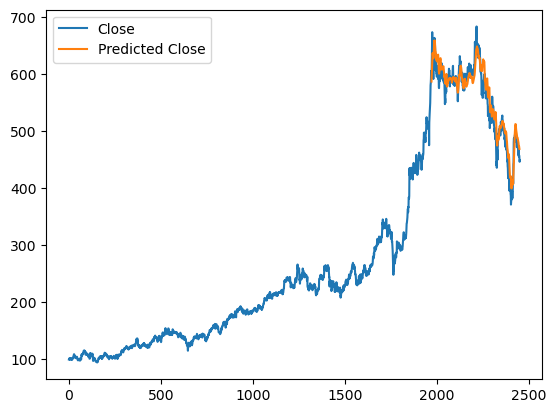

In [86]:
# plot the test set predictions
df['Predicted Close'] = np.nan
df['Predicted Close'].iloc[- y_pred.shape[0]:] = y_pred.flatten()
plot=df[['Close', 'Predicted Close']].plot()
fig = plot.get_figure()
fig.savefig("multi_intput_LSTM_model_eps32_bsize64.png")

In [87]:
res=pd.concat([stock_data['DateTime'],df],axis=1)
res

,DateTime,Transaction,Open,High,Low,Change,Close,TrustNet,future,Predicted Close
0,2013-01-02,14353,97.6,99.9,97.1,2.6,99.6,1599,100.5,NaN
1,2013-01-03,12616,100.5,102.0,100.0,1.4,101.0,410,99.7,NaN
2,2013-01-04,10276,100.5,101.5,100.0,0.5,101.5,44,100.0,NaN
3,2013-01-07,9042,101.0,101.0,99.1,1.0,100.5,-722,101.0,NaN
4,2013-01-08,9463,99.6,100.0,98.9,0.8,99.7,-426,101.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2447,2022-12-26,16718,454.0,457.0,453.5,1.5,456.5,-69,446.0,473.297729
2448,2022-12-27,13482,458.0,462.5,457.0,0.5,457.0,61,448.5,471.285919
2449,2022-12-28,59400,451.0,452.0,446.0,6.0,451.0,-59,NaN,468.514435
2450,2022-12-29,34637,444.0,449.5,442.5,5.0,446.0,-123,NaN,NaN


In [88]:
dfpred=res[['DateTime','Close', 'Predicted Close']].dropna()
dfpred

,DateTime,Close,Predicted Close
1971,2021-01-15,601.0,586.498291
1972,2021-01-18,607.0,594.784973
1973,2021-01-19,627.0,604.194641
1974,2021-01-20,647.0,615.119385
1975,2021-01-21,673.0,623.668030
...,...,...,...
2445,2022-12-22,468.0,475.134003
2446,2022-12-23,455.0,472.684021
2447,2022-12-26,456.5,473.297729
2448,2022-12-27,457.0,471.285919


<AxesSubplot: xlabel='DateTime'>

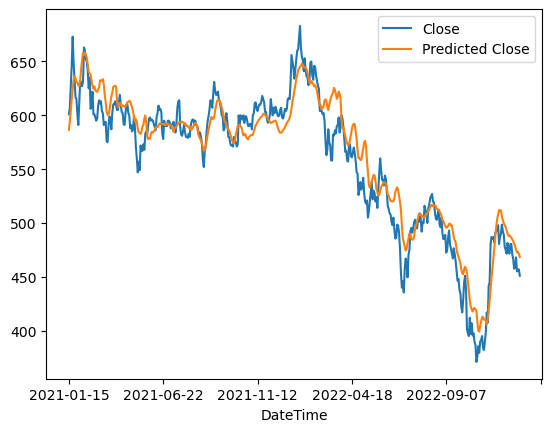

In [89]:
dfpred.plot(x='DateTime')